# 第三次个人作业（机器学习 + 社会网络分析，满分15分；但最后会在总成绩中折合为10分）

## 第一部分：机器学习（本部分满分10分）

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import warnings
import time
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from collections import Counter
warnings.filterwarnings(action='ignore')
mpl.rcParams['font.family']='fangsong'
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:.8f}'.format
np.set_printoptions(precision=6, suppress=True)

C:\Users\82107\anaconda3\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


1.1（共6分）请针对Bank Marketing数据集（'bank.csv'）以最后一个字段（y）为标签，建立分类模型。  
数据集介绍请参考[链接](https://archive.ics.uci.edu/dataset/222/bank+marketing)。注意，模型准确率不影响本作业的得分。

作业具体要求如下：

In [2]:
bank_data=pd.read_csv(r'C:\Users\82107\Desktop\个人作业3\第三次作业\bank.csv',sep=';')

1.1.1 数据预处理（2分）  
(1) 选择合适的预处理处理方式对标称变量编码（1分）；   
(2) 找到缺失值，并选择合适方式对缺失值填充（1分）。  

In [3]:
#请按数据集的说明查看有缺失值的列的缺失值情况
print(bank_data['contact'].value_counts())
print(bank_data['pdays'].value_counts())
print(bank_data['poutcome'].value_counts())

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


In [4]:
bank_data.drop(['pdays','poutcome','duration'],axis=1,inplace=True)

In [5]:
bank_data['contact'].replace('unknown',np.nan,inplace=True)

In [6]:
bank_data['contact'].fillna(method='bfill',inplace=True)

In [7]:
print(bank_data['contact'].value_counts())

contact
cellular     42233
telephone     2978
Name: count, dtype: int64


#### 从上分布能看出，pdays列和poutcom列的缺失值占整个数据的一般以上，所以直接删除这两列,还有按数据集的说明duration列对预测模型的影响程度很大，会影响准确的判断，因此把它删除，还有contact列的缺失值也很多，但不到50%，因此用bfill代替缺失值。

In [8]:
from sklearn.preprocessing import OneHotEncoder
categorical=['job','marital','default','education','housing','loan','contact','month']
enc = OneHotEncoder()
for i in categorical:
    bank_data_enc=enc.fit_transform(bank_data[[i]]).toarray()
    bank_data=pd.concat([bank_data.drop(columns=[i]),
           pd.DataFrame(bank_data_enc, columns=[i+':' + col for col in enc.categories_[0]])], axis=1)

1.1.2 建立模型（2.5分）：选择3个不同的模型进行建模，并统计训练准确率。

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

X = bank_data[bank_data.columns.difference(['y'])]
y =  bank_data.loc[:,'y']
y.replace({'no':0,'yes':1},inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [10]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_train_preds1=logistic.predict(X_train)
y_test_preds1 = logistic.predict(X_test) 
y_test_predprob1 = logistic.predict_proba(X_test)[:,1] 

In [11]:
Randomforest = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
Randomforest.fit(X_train,y_train)
y_train_preds2 = Randomforest.predict(X_train)
y_test_preds2 = Randomforest.predict(X_test) 
y_test_predprob2 = Randomforest.predict_proba(X_test)[:,1] 

In [12]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(X_train,y_train)
y_train_preds3 = adaboost.predict(X_train)
y_test_preds3 = adaboost.predict(X_test) 
y_test_predprob3 = adaboost.predict_proba(X_test)[:,1] 

In [13]:
def score(name,trainY,testY,train_pred,test_pred,test_prob):   
    train_acc = accuracy_score(trainY, train_pred)
    test_acc = accuracy_score(testY, test_pred)
    print('--------------------------------------------')
    print(name+'train acc score: ',f'{train_acc:.6f}')
    print(name+'test acc score: ',f'{test_acc:.6f}', '\n')
    print('--------------------------------------------')
logistic_accuracy=score('logistic_',y_train,y_test,y_train_preds1,y_test_preds1,y_test_predprob1)
Randomforest_accuracy=score('Randomforest',y_train,y_test,y_train_preds2,y_test_preds2,y_test_predprob2)
adaboost_accuracy=score('adaboost',y_train,y_test,y_train_preds3,y_test_preds3,y_test_predprob3)

--------------------------------------------
logistic_train acc score:  0.881829
logistic_test acc score:  0.882672 

--------------------------------------------
--------------------------------------------
Randomforesttrain acc score:  0.882825
Randomforesttest acc score:  0.883888 

--------------------------------------------
--------------------------------------------
adaboosttrain acc score:  0.884290
adaboosttest acc score:  0.884220 

--------------------------------------------


1.1.3 模型比较（1.5分）  
(1) 比较不同模型的混淆矩阵（0.5分）；  
(2) 比较不同模型的ROC曲线（0.5分） ；   
(3) 比较不同模型的AUC值（0.5分） 。

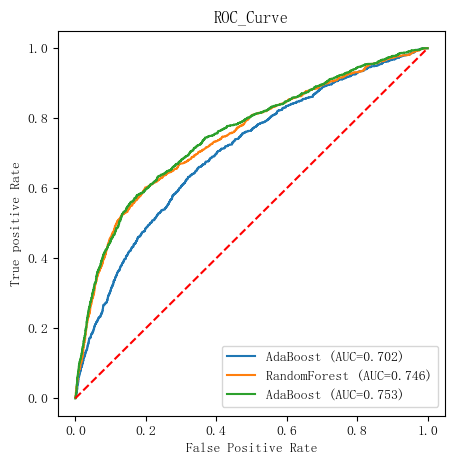

In [18]:
def draw_roc_curve(Fpr1,Tpr1,Fpr2,Tpr2,Fpr3,Tpr3,lab1,lab2,lab3,y_test,y_test_predprob1,y_test_predprob2,y_test_predprob3):
    plt.figure(figsize=(5,5))
    plt.plot(Fpr1,Tpr1,label='{} (AUC={:.3f})'.format(lab3,roc_auc_score(y_test,y_test_predprob1)))
    plt.plot(Fpr2,Tpr2,label='{} (AUC={:.3f})'.format(lab2,roc_auc_score(y_test,y_test_predprob2)))
    plt.plot(Fpr3,Tpr3,label='{} (AUC={:.3f})'.format(lab3,roc_auc_score(y_test,y_test_predprob3)))
    plt.plot([0,1],[0,1],color='red',lw=1.5 ,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('ROC_Curve')
    plt.legend(bbox_to_anchor=(1,0.2))
    plt.show()
Fpr1,Tpr1,thresholds1=roc_curve(y_test,y_test_predprob1)    
Fpr2,Tpr2,thresholds2=roc_curve(y_test,y_test_predprob2)
Fpr3,Tpr3,thresholds3=roc_curve(y_test,y_test_predprob3)
y=draw_roc_curve(Fpr1,Tpr1,Fpr2,Tpr2,Fpr3,Tpr3,'Logistic regression','RandomForest','AdaBoost',y_test,y_test_predprob1,y_test_predprob2,y_test_predprob3)

In [15]:
from sklearn.metrics import confusion_matrix as CM
import seaborn as sns
plt.figure(figsize=(6,4))
cm=CM(y_test,y_test_preds1)
label=[0,1]
sns.heatmap(cm,annot=True,fmt='d',cmap=plt.get_cmap('Blues'))
plt.title('Predicted condition\nTrue                            False')
plt.ylabel('Actual condition\nFalse                             True')
plt.xlabel('Confusion Matrix')

AttributeError: module 'seaborn' has no attribute 'heatmap'

<Figure size 600x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,4))
cm2=CM(y_test,y_test_preds2)
label=[0,1]
sns.heatmap(cm,annot=True,fmt='d',cmap=plt.get_cmap('Blues'))
plt.title('Predicted condition\nTrue                            False')
plt.ylabel('Actual condition\nFalse                             True')
plt.xlabel('Confusion Matrix')

In [ ]:
plt.figure(figsize=(6,4))
cm3=CM(y_test,y_test_preds3)
label=[0,1]
sns.heatmap(cm,annot=True,fmt='d',cmap=plt.get_cmap('Blues'))
plt.title('Predicted condition\nTrue                            False')
plt.ylabel('Actual condition\nFalse                             True')
plt.xlabel('Confusion Matrix')

1.2.（共4分）请利用'order.csv'数据集进行分析。  
作业具体要求如下：

In [ ]:
import pandas as pd
order = pd.read_csv(r'C:\Users\82107\Desktop\个人作业3\第三次作业\order.csv', encoding= 'utf-8')
order.head()

In [ ]:
order['区域'].unique()

1.2.1 探索性数据分析（2分）  
(1) 分析数据集中离散特征(比如:销售大区、国家、产品类别等，不少于4个)的数据分布情况，并绘图展示（1分）；  
(2) 对各个国家的购物偏好（产品类别、产品名称等可供分析的指标）进行可视化(1分)。

In [ ]:
place=order['销售大区'].value_counts().to_frame().reset_index()
nations=order['国家'].value_counts().to_frame().reset_index()
product_type=order['产品类别'].value_counts().to_frame().reset_index()
product_name=order['产品名称'].value_counts().to_frame().reset_index()
fig,axs=plt.subplots(2,2,figsize=(17,15))
axs[0,0].bar(place['销售大区'],place['count'])
axs[0,0].legend([order['销售大区'].value_counts().to_frame()],bbox_to_anchor=(1,1))

axs[1,0].bar(nations['国家'],nations['count'])
axs[1,0].legend([order['国家'].value_counts().to_frame()],bbox_to_anchor=(1,1))

axs[0,1].bar(product_type['产品类别'],product_type['count'])
axs[0,1].legend([order['产品类别'].value_counts().to_frame()],bbox_to_anchor=(1,1))

axs[1,1].bar(product_name['产品名称'],product_name['count'])
axs[1,1].legend([order['产品名称'].value_counts().to_frame()],bbox_to_anchor=(1,1))
axs[1,1].set_xticklabels(product_name['产品名称'], rotation=-310)
plt.show()

In [ ]:
product_type_n=order.groupby('国家')['产品类别'].value_counts()
product_type_n_df=product_type_n.unstack()
product_name_n=order.groupby('国家')['产品名称'].value_counts()
product_name_n_df=product_name_n.unstack()
product_price_n=order.groupby('国家')['产品成本'].value_counts()
product_price_n_df=product_price_n.unstack()
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(10,50))
product_type_n_df.plot(kind='barh',ax=ax1,title='各国购物的产品类别分布')
product_name_n_df.plot(kind='barh',ax=ax2,title='各国购物的产品名称分布',colormap='GnBu')
product_price_n_df.plot(kind='barh',ax=ax3,title='各国购物的产品成本分布',colormap='GnBu')

1.2.2 关联规则挖掘（2分）  

(1) 以日期(天)为单位，按<区域>进行划分（不同国家的用户购买偏好可能存在差异），对产品名称进行关联规则挖掘，可自行指定最小支持度和最小置信度阈值，并给出理由（1.5分）；     

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
purchase_n=order.groupby(['区域', '订单日期'])['产品名称'].apply(list).reset_index()
t_enc=TransactionEncoder()
t_enc_array=t_enc.fit(purchase_n['产品名称']).transform(purchase_n['产品名称'])
t_enc_array_df=pd.DataFrame(t_enc_array,columns=t_enc.columns_)
itemset_support=apriori(t_enc_array_df,min_support=0.25,use_colnames=True)
rule=association_rules(itemset_support,metric='confidence',min_threshold=0.9)
rule.iloc[:,:6]

Lin, W., Alvarez, S. A., & Ruiz, C. (2002). Efficient adaptive-support association rule mining for recommender systems. Data mining and knowledge discovery, 6, 83-105.
从上论文中的图10中能看出，按不同的支持度的变化发生的准确度，检全率，检准率的变化，从0.2到0.3开始检全率和检准率同时下降，我觉得推荐系统要求比较高的准确度和检准率，因此支持度设置为0.25（支持度设置为0.3的话只有关于13件商品的关联规则，为了检全率设置为0.25）,关联规则用置信度来判断规则的实用性，如果置信度阈值低的话，进行商品陈列或相关营销时会没有效果，因此可能会直接影响销售额，所以设置得比较高。。

(2) 对不同区域的关联规则进行解释和比较（0.5分）。

## 大中华区

In [ ]:
order_reg1=purchase_n[purchase_n['区域']=='大中华区']
t_enc_array1=t_enc.fit(order_reg1['产品名称']).transform(order_reg1['产品名称'])
t_enc_array_df1=pd.DataFrame(t_enc_array1,columns=t_enc.columns_)
itemset_support1=apriori(t_enc_array_df1,min_support=0.35,use_colnames=True)
rule=association_rules(itemset_support1,metric='confidence',min_threshold=0.9)
rule

## 新加坡

In [ ]:
order_reg2=purchase_n[purchase_n['区域']=='新加坡']
t_enc_array2=t_enc.fit(order_reg2['产品名称']).transform(order_reg2['产品名称'])
t_enc_array_df2=pd.DataFrame(t_enc_array2,columns=t_enc.columns_)
itemset_support2=apriori(t_enc_array_df2,min_support=0.25,use_colnames=True)
rule2=association_rules(itemset_support2,metric='confidence',min_threshold=0.9)
rule2

## 韩国

In [ ]:
order_reg3=purchase_n[purchase_n['区域']=='韩国']
t_enc_array3=t_enc.fit(order_reg3['产品名称']).transform(order_reg3['产品名称'])
t_enc_array_df3=pd.DataFrame(t_enc_array3,columns=t_enc.columns_)
itemset_support3=apriori(t_enc_array_df3,min_support=0.25,use_colnames=True)
rule3=association_rules(itemset_support3,metric='confidence',min_threshold=0.9)
rule3

## 第二部分：社会网络分析（本部分满分5分）

2.1 请利用'soc-sign-bitcoinotc.csv'创建网络模型，数据集介绍请参考[链接](http://snap.stanford.edu/data/soc-sign-bitcoin-otc.html)。
计算以下指标或回答以下问题（共3分）：

（1）网络中节点的数量（0.25分）；

（2）网络中边的数量（0.25分）；

（3）网络的平均聚类系数（Average clustering coefficient）（0.25分）；

（4）网络的密度（0.25分）；

（5）对边权的分布做可视化，并对可视化结果做简要描述（0.5分，其中可视化0.25分，描述0.25分）；

（6）对节点的度分布进行描述（0.5分，其中对度分布进行适当的可视化0.25分，对结果做描述0.25分）；

（7）选择网络中节点度数最高的5个节点，然后计算它们的degree centrality和closeness centrality（1分）。

In [ ]:
#读取file的时候发生Error：Failed to convert weight data rating to type <class 'float'>
#为了解决在网上查找发现CSV file中有问题，所以source column前面加#，解决问题
bitcoin_SNA=nx.read_weighted_edgelist(r'C:\Users\82107\Desktop\个人作业3\第三次作业\soc-sign-bitcoinotc.csv',delimiter=',')
bitcoin_data=pd.read_csv(r'C:\Users\82107\Desktop\个人作业3\第三次作业\soc-sign-bitcoinotc.csv')

In [ ]:
print('(1)网络中节点的数量:',len(bitcoin_SNA.nodes))
print('(2)网络中中边的数量:',len(bitcoin_SNA.edges))

In [ ]:
CC=nx.clustering(bitcoin_SNA)
ACC= sum(CC.values()) / len(CC)
print('(3):网络的平均聚类系数:',ACC)

In [ ]:
print('(4):网络的密度:',nx.density(bitcoin_SNA))

In [ ]:
plt.hist(bitcoin_data['rating'], bins=30,edgecolor='black')
plt.title('Distribution of weights value')
plt.xlabel('Weights value')
plt.ylabel('Frequency')
plt.show()

## 这幅图展示了边权的分布。从直方图可以看出，大部分的评分集中在较低的值区域，以0分为基准显示出一种向左偏斜的分布特征。这表明在该网络中，较低的评分更为常见。同时，也存在一些较高的评分，但其频率较低。

In [ ]:
sorted_degree = sorted([degree for n, degree in bitcoin_SNA.degree()], reverse=True)
degree_distribution = pd.DataFrame(sorted_degree, columns=['Degree'])
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution['Degree'], bins=30, edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
#由于数据之间的差距很大不能看出明确的区别，因此用log进行scailing
plt.yscale('log')
plt.show()

In [ ]:
degree_count=nx.degree(bitcoin_SNA)
deg_sorted = sorted(dict(degree_count).items(), reverse=True, key=lambda x:x[1])
top5_deg=deg_sorted[:5]
for i in top5_deg:
    print('网络中节点度数最高的5个节点:',i[0],'度数:',i[1])

In [ ]:
degree_centrality = nx.degree_centrality(bitcoin_SNA)
closeness_centrality = nx.closeness_centrality(bitcoin_SNA)

In [ ]:
for i in top5_deg:
    print('1.degree_centrality:',degree_centrality[i[0]],'closeness_centrality:',closeness_centrality[i[0]])

## 这幅图展示了边权的分布。从直方图可以看出大部分的节点的度数比较小，因此这幅图显示向左偏倾斜分布特征。这表明该网络中节点度数比较小的节点常见。同时也存在一些度数很多的节点，但其数量不多。

2.2 请利用'collaboration.edgelist.txt'创建作者合作网络：每个节点代表一个作者，如果两个节点在数据集中共同创作了至少一篇论文，则两个节点存在边关系。</br>
计算以下指标或回答以下问题(共1.75分)：

（1）找出两个你认为比较“重要”的节点（建议使用上课提到的几种中心性），然后计算它们之间的最短路径（0.5分）；

（2）从现在的作者合作网络中构建一个子网络，这个子网络的所有节点在原合作网络都至少被关联5次，这个子网络的边即上述筛选过的节点之间的合作关系。请使用边列表（edgelist）的形式将这个子网络写（write）入一个文件中。（1.25分，其中正确的建立子网络1分，写入文件0.25分）；


（1）找出两个你认为比较“重要”的节点（建议使用上课提到的几种中心性），然后计算它们之间的最短路径

In [ ]:
G_col=nx.read_edgelist(r'C:\Users\82107\Desktop\个人作业3\第三次作业\collaboration.edgelist.txt')
#用上课讲的度数中心性来找出重要的节点
degree_C=nx.degree_centrality(G_col)
imp_node=[]
#为了排序用指数表达的数据改成小数的形式
for k,v in degree_C.items():
    degree_C[k]= f'{v:.12f}'
degree_C=sorted(degree_C.items(),key=lambda x:x[1],reverse=True)
#排序之后取出度数中心性最高的两个节点
for i in degree_C:
    imp_node.append(i[0])
    if len(imp_node)==2:
        break
nx.shortest_path(G_col,'15755','11301')



（2）从现在的作者合作网络中构建一个子网络，这个子网络的所有节点在原合作网络都至少被关联5次，这个子网络的边即上述筛选过的节点之间的合作关系。请使用边列表（edgelist）的形式将这个子网络写（write）入一个文件中。

In [ ]:
node_over_f = [i for i,j in dict(G_col.degree()).items() if j >= 5]
sub=G_col.subgraph(node_over_f).copy()
new_edgelist=r'C:\Users\82107\Desktop\new_edgelist.csv'
nx.write_edgelist(sub,new_edgelist,data=False)


确认

In [ ]:
confirm=nx.read_edgelist(r'C:\Users\82107\Desktop\new_edgelist.csv')
len(confirm.edges)

2.3 简要回答（不超过200字）：什么是KOL(Key Opinion Leader，关键意见领袖）？它在网络分析中可以有什么应用？（可以举例不同的网络类型，比如社群Twitter、作者合作网络等来说明）（0.25分）

关键意见领袖是在某个领域中具有较高影响力的人，或拥有大量粉丝的超级网红，他们的观点和行为能够显著影响其他人的决策和行为。各企业通过分析用户的度数或互动频率等信息找出KOL，然后通过与他们合作，利用其影响力进行产品推广和品牌宣传，提高曝光率和销售额，还有在学术界通过分系合作状态，被引次数找出KOL，还有通过这些人物能了解他们属于的领域的最新研究动态，发展趋势